## 2.1.1Getting started

In [1]:
import torch

- A tensor represents a (possibly multidimensional) array of numerical values. In the one-dimensional case, i.e., when only one axis is needed for the data, a tensor is called a vector. With two axes, a tensor is called a matrix. With 
 K>2 axes, we drop the specialized names and just refer to the object as a 
-order tensor.

 - PyTorch provides a variety of functions for creating new tensors prepopulated with values. For example, by invoking arange(n), we can create a vector of evenly spaced values, starting at 0 (included) and ending at n (not included). By default, the interval size is 1
. Unless otherwise specified, new tensors are stored in main memory and designated for CPU-based computation.

In [2]:
X = torch.arange(12,dtype=torch.float32)
X

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

- Each of these values is called an element of the tensor. The tensor x contains 12 elements. We can inspect the total number of elements in a tensor via its numel method.

In [3]:
X.numel()

12

- We can access a tensor’s shape (the length along each axis) by inspecting its shape attribute. Because we are dealing with a vector here, the shape contains just a single element and is identical to the size.

In [5]:
X.size()

torch.Size([12])

- We can change the shape of a tensor without altering its size or values, by invoking reshape. For example, we can transform our vector x whose shape is (12,) to a matrix X with shape (3, 4). This new tensor retains all elements but reconfigures them into a matrix. Notice that the elements of our vector are laid out one row at a time and thus x[3] == X[0, 3].

In [6]:
X.reshape(3,4)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

- if we don't know which element we should multiply in you can replace it with -1, in our case we can replace (3,4) to (-1,4)  

- Practitioners often need to work with tensors initialized to contain all 0s or 1s. We can construct a tensor with all elements set to 0 and a shape of (2, 3, 4) via the zeros function.

In [7]:
torch.zeros(2,3,4)

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [8]:
torch.ones(2,3,4)

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

- We often wish to sample each element randomly (and independently) from a given probability distribution. For example, the parameters of neural networks are often initialized randomly. The following snippet creates a tensor with elements drawn from a standard Gaussian (normal) distribution with mean 0 and standard deviation 1.

In [9]:
torch.randn(3, 4)

tensor([[-0.8882,  0.7890, -0.9780, -0.8389],
        [-0.6238,  1.1619,  0.2615, -1.2139],
        [ 0.5253, -0.1665, -0.9700,  0.7232]])

- Finally, we can construct tensors by supplying the exact values for each element by supplying (possibly nested) Python list(s) containing numerical literals. Here, we construct a matrix with a list of lists, where the outermost list corresponds to axis 0, and the inner list corresponds to axis 1.

In [14]:
x= torch.tensor([[1,2,3],[4,5,6]])

## 2.1.2. Indexing and Slicing¶

- As with Python lists, we can access tensor elements by indexing (starting with 0). To access an element based on its position relative to the end of the list, we can use negative indexing. Finally, we can access whole ranges of indices via slicing (e.g., X[start:stop]), where the returned value includes the first index (start) but not the last (stop). Finally, when only one index (or slice) is specified for a k-order tensor, it is applied along axis 0. Thus, in the following code, [-1] selects the last row and [1:3] selects the second and third rows.

In [11]:
X[-1], X[1:3]

(tensor(11.), tensor([1., 2.]))

In [15]:
x[0, 1] = 17
x

tensor([[ 1, 17,  3],
        [ 4,  5,  6]])

In [17]:
x[:2, :] = 12
x

tensor([[12, 12, 12],
        [12, 12, 12]])

## 2.1.3. Operations

In [18]:
torch.exp(x)

tensor([[162754.7969, 162754.7969, 162754.7969],
        [162754.7969, 162754.7969, 162754.7969]])

In [19]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y

(tensor([ 3.,  4.,  6., 10.]),
 tensor([-1.,  0.,  2.,  6.]),
 tensor([ 2.,  4.,  8., 16.]),
 tensor([0.5000, 1.0000, 2.0000, 4.0000]),
 tensor([ 1.,  4., 16., 64.]))

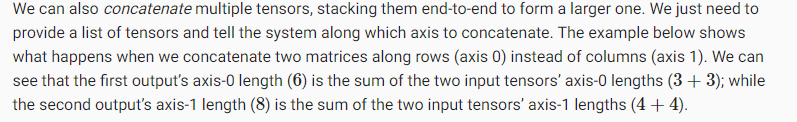

In [34]:
S = torch.arange(12, dtype=torch.float32).reshape(3,4)
W  =torch.tensor([[1,2,3,2],[5,4,3,5],[7,8,9,7]])
torch.cat((S,W),dim=0) ,torch.cat((S,W),dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 1.,  2.,  3.,  2.],
         [ 5.,  4.,  3.,  5.],
         [ 7.,  8.,  9.,  7.]]),
 tensor([[ 0.,  1.,  2.,  3.,  1.,  2.,  3.,  2.],
         [ 4.,  5.,  6.,  7.,  5.,  4.,  3.,  5.],
         [ 8.,  9., 10., 11.,  7.,  8.,  9.,  7.]]))

- Sometimes, we want to construct a binary tensor via logical statements. Take X == Y as an example. For each position i, j, if X[i, j] and Y[i, j] are equal, then the corresponding entry in the result takes value 1, otherwise it takes value 0.

In [36]:
S == W

tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

In [38]:
S.sum()

tensor(66.)

## 2.1.5. Saving Memory

In [1]:
Y = 3
X = 5
before = id(Y)
Y = X+Y
before == id(Y)

False

- This might be undesirable for two reasons. First, we do not want to run around allocating memory unnecessarily all the time. In machine learning, we often have hundreds of megabytes of parameters and update all of them multiple times per second. Whenever possible, we want to perform these updates in place. Second, we might point at the same parameters from multiple variables. If we do not update in place, we must be careful to update all of these references, lest we spring a memory leak or inadvertently refer to stale parameters